In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


• Construya la tabla de frecuencias.
• ¿Cuál es la temperatura más frecuente que se registra en la ciudad?
• Interprete n4, f4, N4, F4
• ¿Qué porcentaje de registros se encuentran entre 28 y 30 grados?
• Realice un gráﬁco de barras
• Realice un gráﬁco de ojiva

**Diccionario**
- xi: Etiquetas
- ni: Frecuencia absoluta
- fi: Frecuencia relativa
- Ni: Frecuencia absoluta acumulada
- Fi: Frecuencia relativa acumulada

In [92]:
def sumar_acumulado(arre):
    i = 1
    n = len(arre)
    while(i<n):
        x = arre[i] + arre[i-1]
        arre[i] = x
        i=i+1
    return arre;

#### Tabla de frecuencia

In [93]:
data = [32, 31, 28, 29, 33, 32, 31, 30, 31, 31, 27, 28, 29, 30, 32, 31, 31, 30, 30, 29, 29, 30, 30, 31, 30, 31, 34, 33, 33, 29, 29]
data = pd.Series(data)

In [94]:
etiquetas = pd.Series(data.unique())
etiquetas

0    32
1    31
2    28
3    29
4    33
5    30
6    27
7    34
dtype: int64

In [95]:
#4) ni
ni = data.value_counts()
ni = ni.reindex(index=etiquetas)
ni.index = etiquetas.index
ni

0    3
1    8
2    2
3    6
4    3
5    7
6    1
7    1
dtype: int64

In [96]:
total = np.sum(ni)
total

31

In [97]:
fi = ni/total
fi

0    0.096774
1    0.258065
2    0.064516
3    0.193548
4    0.096774
5    0.225806
6    0.032258
7    0.032258
dtype: float64

In [98]:
Ni = sumar_acumulado(list(ni))
Fi = sumar_acumulado(list(fi))
Ni, Fi

([3, 11, 13, 19, 22, 29, 30, 31],
 [0.0967741935483871,
  0.3548387096774194,
  0.41935483870967744,
  0.6129032258064516,
  0.7096774193548387,
  0.935483870967742,
  0.967741935483871,
  1.0])

In [99]:
dataF = {'xi':etiquetas, 'ni':ni, 'fi':fi,'Ni': Ni, 'Fi':Fi }
dataF = pd.DataFrame(dataF)
dataF

,xi,ni,fi,Ni,Fi
0,32,3,0.096774,3,0.096774
1,31,8,0.258065,11,0.354839
2,28,2,0.064516,13,0.419355
3,29,6,0.193548,19,0.612903
4,33,3,0.096774,22,0.709677
5,30,7,0.225806,29,0.935484
6,27,1,0.032258,30,0.967742
7,34,1,0.032258,31,1.000000


[Text(0, 0, '32'),
 Text(0, 0, '31'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '30'),
 Text(0, 0, '27'),
 Text(0, 0, '34')]

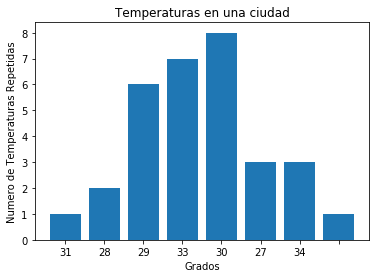

In [100]:
y = dataF['ni']
x = dataF['xi']
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Numero de Temperaturas Repetidas')
ax.set_xlabel('Grados')
ax.set_title('Temperaturas en una ciudad')
ax.set_xticklabels(x)